In [42]:
import numpy as np
import pandas as pd

import dateutil.rrule
import datetime

%matplotlib inline

In [21]:
rule = dateutil.rrule.rrule(dateutil.rrule.HOURLY, datetime.datetime(1970, 1, 1), count=24*365*100)

In [32]:
dates = np.fromiter(rule, dtype='datetime64[h]')
hours = np.arange(len(dates))

In [38]:
df = pd.DataFrame(data=dict(dates=dates, hours=hours))


In [50]:
df['tide'] = 1.5 * np.sin(np.pi * 2 * df['hours'] / 12.25)
df['slr'] = df['hours'] / (24 * 365) * 0.002 
df['nodal'] = 0.015 * np.sin(np.pi * 2 * df['hours'] / (12.25 * 365 * 18.613))

df['slr'].iloc[-1] - df['slr'].iloc[0]

0.19999977168949773

In [79]:
windows = list(range(1, 24)) + list(range(24, 24*30, 10)) + [24*30, 24*365, 24*365*10, 24*365*15, 24*365*18, 24*365*20, 24*365*30, 24*365*50]
records = []
for window in windows:
    record = df[['nodal', 'slr', 'tide']].rolling(window=window).mean().std()
    record['window'] = window
    records.append(record)
window_df = pd.DataFrame(records)

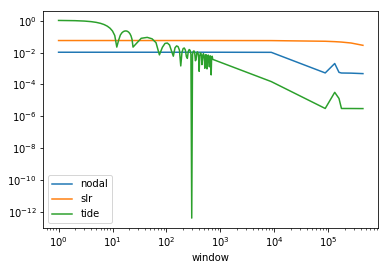

In [82]:
window_df.plot('window', logx=True, logy=True)
